In [1]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [4]:
df.shape

(155223, 19)

In [5]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [8]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [9]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [10]:
df.shape

(75345, 19)

## Feature Scaling

In [11]:
feature_scale = [feature for feature in df.columns if feature not in ['Target']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
0,1,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
1,0,0.505636,0.196981,0.742734,0.641791,0.567164,0.0,0.625806,0.87,0.622642,0.164835,0.00,0.559140,0.000000,0.602941,1.0,0.531429,0.333333,0.181818
2,0,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
3,1,0.505636,0.196981,0.742734,0.611940,0.611940,0.0,0.619355,0.76,0.698113,0.285714,0.34,0.698925,0.000000,0.705882,1.0,0.274286,0.333333,0.181818
4,0,0.505636,0.196981,0.742734,0.611940,0.731343,0.0,0.432258,0.26,0.792453,0.175824,0.61,0.763441,0.097011,0.558824,0.8,0.291429,0.333333,0.272727


# Train Test split

In [12]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10, stratify=y) #train test split in 50:50 ratio

In [13]:
X_train.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month
9747,0.002883,0.588673,0.563257,0.537313,0.597015,0.0,0.625806,0.34,0.698113,0.087912,0.47,0.849462,0.006155,0.529412,0.6,0.437143,0.333333,0.090909
26293,0.000128,0.565977,0.552531,0.626866,0.701493,0.0,0.554839,0.48,0.849057,0.054945,0.56,0.881720,0.118406,0.558824,0.7,0.742857,0.333333,0.363636
41021,0.004803,0.645345,0.577569,0.791045,0.850746,0.0,0.625806,0.81,0.924528,0.252747,0.18,0.623656,0.007327,0.470588,1.0,0.225714,0.333333,0.636364
12705,0.001296,0.579009,0.530510,0.671642,0.701493,0.0,0.625806,0.14,0.792453,0.065934,0.21,0.731183,0.027550,0.529412,0.9,0.600000,0.333333,0.181818
48883,0.000317,0.582719,0.525652,0.641791,0.656716,0.0,0.625806,0.02,0.754717,0.021978,0.33,0.698925,0.030481,0.544118,0.9,0.397143,0.333333,0.818182


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier().fit(X_train,y_train)
y_pred= classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10394  9973]
 [11836  5470]]
0.4210973376157991
              precision    recall  f1-score   support

           0       0.47      0.51      0.49     20367
           1       0.35      0.32      0.33     17306

    accuracy                           0.42     37673
   macro avg       0.41      0.41      0.41     37673
weighted avg       0.42      0.42      0.42     37673



### K Fold Cross Validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = DecisionTreeClassifier() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.65481088 0.59097545 0.58155275 0.57770405 0.57956204 0.57751526
 0.56384391 0.44133263 0.52468808 0.48460313]
Max : 0.6548108825481088
Min : 0.44133262543137775
Mean : 0.5576588186199117


### Stratified K-fold Cross Validation

In [21]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = DecisionTreeClassifier() 
scores=cross_val_score(model,X,y,cv=skfold)
print(scores)
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

[0.54439283 0.26648971 0.1800929  0.12806901 0.09807565 0.04884523
 0.00225644 0.14242102 0.43005044 0.45672949]
Max : 0.5443928334439283
Min : 0.002256437483408548
Mean : 0.22974227342572112


## Graphical Analysis

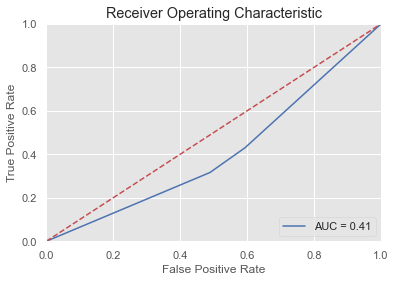

In [15]:
from sklearn.metrics import roc_curve, auc

probs               = classifier.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV


In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()

# define grid search
parameters={"splitter":["best","random"],
            'criterion':['entropy','gini'],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            'min_samples_split': [2, 5, 10, 14],
           "max_features":["auto","log2","sqrt",None]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

grid_search = GridSearchCV(model, param_grid=parameters, cv=cv, scoring='accuracy',error_score=0, verbose=2)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 30 folds for each of 4480 candidates, totalling 134400 fits
[CV] criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best 
[CV]  criterion=entropy, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, split

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best, total=   0.1s
[CV] criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best 
[CV]  criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, splitter=best, total= 

[Parallel(n_jobs=1)]: Done 134400 out of 134400 | elapsed: 113.7min finished


Best: 0.591916 using {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}
0.545277 (0.006028) with: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.544560 (0.009022) with: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.548152 (0.008911) with: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.542330 (0.006835) with: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.547268 (0.008268) with: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
0.542242 (0.003558) with: {'criterion': 'entropy', 'max_

Best: 0.591916 using {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}

In [25]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
best_grid=grid_search.best_estimator_
best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Model with parameters

In [27]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[18627  1740]
 [13599  3707]]
Accuracy Score 0.5928383723090808
Classification report:               precision    recall  f1-score   support

           0       0.58      0.91      0.71     20367
           1       0.68      0.21      0.33     17306

    accuracy                           0.59     37673
   macro avg       0.63      0.56      0.52     37673
weighted avg       0.63      0.59      0.53     37673



In [45]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=5, 
                             min_samples_leaf=10,
                             min_samples_split= 5, splitter= 'best')
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

0.5928383723090808
[[18627  1740]
 [13599  3707]]
              precision    recall  f1-score   support

           0       0.58      0.91      0.71     20367
           1       0.68      0.21      0.33     17306

    accuracy                           0.59     37673
   macro avg       0.63      0.56      0.52     37673
weighted avg       0.63      0.59      0.53     37673



## Graphical Analysis

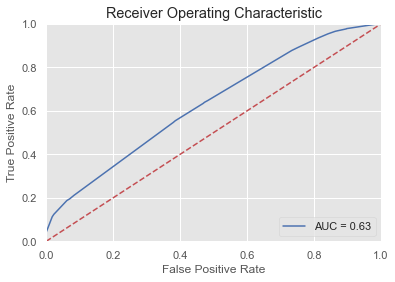

In [46]:
from sklearn.metrics import roc_curve, auc

probs               = clf.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
print('Accuracy before tuning :',accuracy_score(y_test,y_pred))
print()
print('Accuracy after tuning :',accuracy_score(y_test,prediction))

Accuracy before tuning : 0.4210973376157991

Accuracy after tuning : 0.5928383723090808
